In [1]:
!pip install tensorflow
!pip install keras


     -------------------------------------- 272.8/272.8 MB 3.2 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 5.6/5.6 MB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 422.5/422.5 kB 6.6 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 10.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requiremen

In [21]:
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.applications.densenet import DenseNet121
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [22]:
base_model = DenseNet121(weights='imagenet', include_top=False)


In [23]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)


In [24]:
predictions = Dense(14, activation='softmax')(x)


In [25]:
model = Model(inputs=base_model.input, outputs=predictions)


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
import os
print(os.getcwd())


C:\Users\User


In [27]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)


NameError: name 'x_train' is not defined

In [28]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Print the training accuracy
print("Training accuracy: ", history.history['accuracy'])

# Print the validation accuracy
print("Validation accuracy: ", history.history['val_accuracy'])


NameError: name 'x_train' is not defined

NameError: name 'history' is not defined

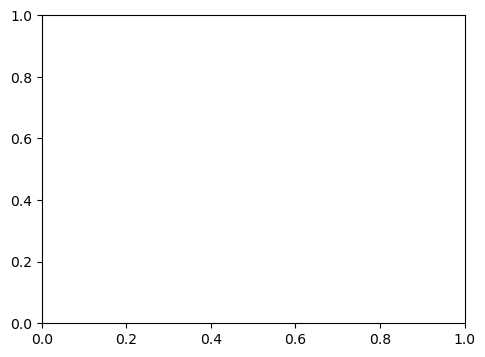

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()